# Statistics on the corpus

The corpus comes from the digitized newspaper collections of the [Latvian National Library (LNB)](http://periodika.lv/)

- Time: 1800-1900
- Language: German
- Keywords: "Sturm", "Hagel", "Überscwhemmung" (storm, hail, flood)
- Created by searching for articles that contain ANY of the keywords

This notebook presents first statistics regarding the number of entries, their temporal distribution, different periodicals etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
import seaborn as sns
from climdist.utils import load_df
import matplotlib.font_manager as fm

In [2]:
fm.fontManager.addfont('../references/cmunorm.ttf')
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)
matplotlib.rcParams['font.family'] = 'CMU Concrete'

In [3]:
df = load_df('main')

In [7]:
df.head()

,date,year,month,day,pub,heading,full_text,href,text_len,placename,origin_date,heading2,readability
0,1802-01-01,1802,1,1,Rigasche Zeitung,"St. Petersburg, den 20. Decemb.","St. Petersburg, den 20. Decemb.\n\n\tAuf Aller...",https://proc.dom.lndb.lv/file.axd?id=3377815&a...,2067,St. Petersburg,20,St. Petersburg,1
1,1802-01-01,1802,1,1,Rigasche Zeitung,"Paris, den 18ten December.","Paris, den 18ten December.\n\n\tDer Oberconsu!...",https://proc.dom.lndb.lv/file.axd?id=3377818&a...,3664,Paris,18,Paris,1
2,1802-01-01,1802,1,1,Rigasche Zeitung,"Haag, den 22sten December.","Haag, den 22sten December.\n\n\tIn kurzem erwa...",https://proc.dom.lndb.lv/file.axd?id=3377819&a...,967,Haag,22,Haag,1
3,1802-01-01,1802,1,1,Rigasche Zeitung,"Zürich, den 16ten December.","Zürich, den 16ten December.\n\n\tDie durch die...",https://proc.dom.lndb.lv/file.axd?id=3377822&a...,482,Zürich,16,Zürich,1
4,1802-01-01,1802,1,1,Rigasche Zeitung,"Wien, den 19ten December.","Wien, den 19ten December.\n\n\tDie Malcheser-N...",https://proc.dom.lndb.lv/file.axd?id=3377823&a...,1154,Wien,19,Wien,1


In [4]:
figsize = (15,7)
bins = range(min(df.year), max(df.year)+2)
ticksrange = np.arange(1802,1890)
xlabels = [num if num%5==0 else '' for num in np.arange(1802,1890)]

## Distribution histogram

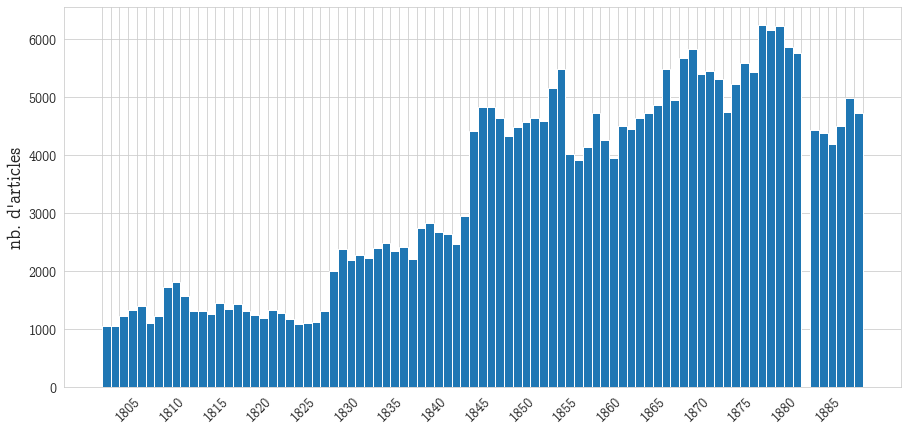

In [6]:
matplotlib.rcParams['font.family'] = 'CMU Concrete'

plt.figure(figsize=figsize)
plt.hist(df.year,bins=bins)
plt.grid(b=True, which='both')
plt.yticks(fontsize=14)
plt.xticks(ticks=ticksrange, labels=xlabels, fontsize=14)
plt.tick_params(axis ='x', rotation = 45)
#plt.title('Distribution temporelle des données', fontsize=20)
plt.ylabel("nb. d'articles", fontsize=18)
sns.set_style(style='whitegrid')

#plt.savefig('../references/memoire/images/articles_histogram.pdf', bbox_inches='tight')

plt.show()

## OCR readability

In [7]:
## example for table in text

ocr_quality_example = df[df.full_text.str.contains('W i t t e f u n g.') == True].index
ocr_quality_text = df.iloc[ocr_quality_example].full_text.values[0]
print(ocr_quality_text)

Witterungs – Beobachtungen. (Varom.-Beob. im Zimmer bei + 15°, 2.)

	orgenS. ittagS. . !
Abends.
W i t t e f u n g.
Oki
ОЩу. ! Barometer, l  Barometer, i J Promoter. | Therm, j ~20 \2%/,-3"lA\* 6°Дк''~ A''',o\&gt;h 7°/6&gt;28"-  WNW. Bewölkt. 21 |28 — 4 /0!+ 2 /7|28 — 3 ,9l&gt;i&lt; 4 /8,28 — 3 ,&lt;M 5 д! WNW. Regen, Nebel. 22 !28 — 1 ,2№ 5 /0|28 — о ,4|* 7 /6|27 — ll  6 ,о! SSW. Bewölkt/ trübe. SZ. !27 —-10 ,o№ 5 ,0127 /Oi&gt;j&lt; 5/5127 —11 ,0j+4 ,8| SSO. Bewölkt/ Regen. ibr.
iavometev. \ Therm, j Vavomerer. I Therm
j Barometer.

	Oki

	ibr.

	iavometev. \ Therm, j Vavomerer.

	ОЩу. ! Barometer, l  Barometer, i J Promoter. | Therm, j
~20 \2%/,-3"lA\* 6°Дк''~ A''',o\&gt;h 7°/6&gt;28"-  WNW. Bewölkt.
21 |28 — 4 /0!+ 2 /7|28 — 3 ,9l&gt;i&lt; 4 /8,28 — 3 ,&lt;M 5 д! WNW. Regen, Nebel.
22 !28 — 1 ,2№ 5 /0|28 — о ,4|* 7 /6|27 — ll  6 ,о! SSW. Bewölkt/ trübe. SZ. !27 —-10 ,o№ 5 ,0127 /Oi&gt;j&lt; 5/5127 —11 ,0j+4 ,8| SSO. Bewölkt/ Regen.

	orgenS.

	ittagS.

	I Therm

	. !

	Abends.

	j B

In [192]:
print(f'Number of illisible texts is {len(df[df.readability==False])}, or about {(round(len(df[df.readability==False])/len(df),2))*100}%')

Number of illisible texts is 32709, or about 11.0%


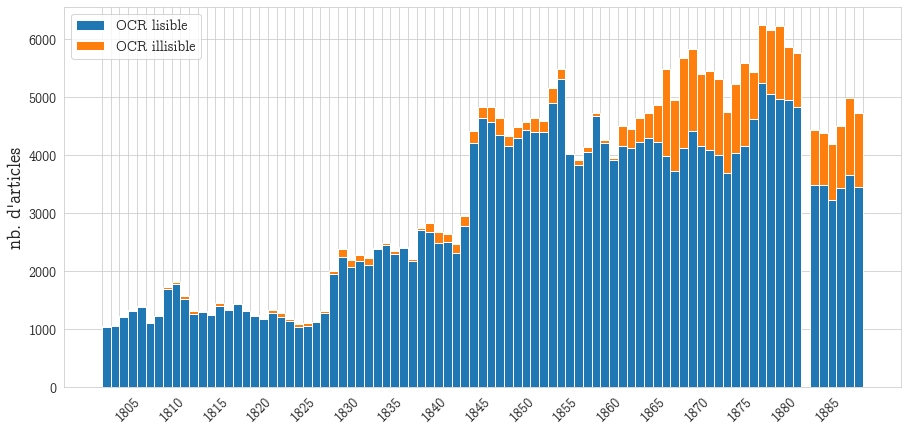

In [9]:
matplotlib.rcParams['font.family'] = 'CMU Concrete'

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.hist([df.year[df.readability==True], df.year[df.readability==False]],
        bins=bins, stacked=True, label=['OCR lisible', 'OCR illisible'])
plt.grid(b=True, which='both')
plt.yticks(fontsize=14)
plt.xticks(ticks=ticksrange, labels=xlabels, fontsize=14)
plt.tick_params(axis ='x', rotation = 45)
#plt.title('Distribution temporelle des données', fontsize=20)
plt.ylabel("nb. d'articles", fontsize=18)
plt.legend(fontsize = 14)
sns.set_style(style='ticks')

plt.savefig('../references/memoire/images/readability_histogram.pdf', bbox_inches='tight')

plt.show()


## Text mass

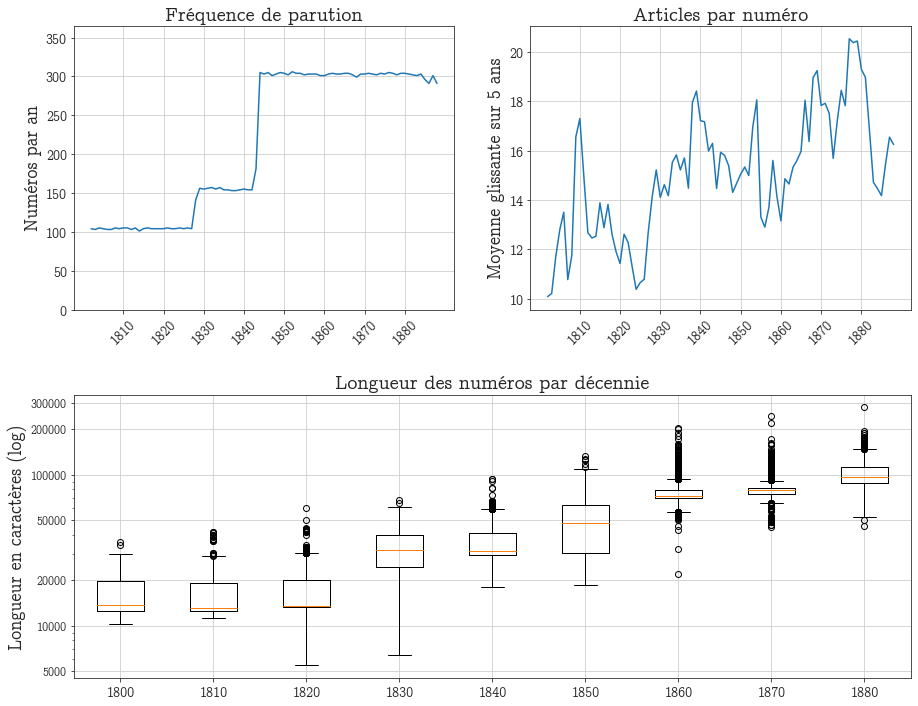

In [14]:
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(15,12))
#fig.tight_layout(h_pad=5)
matplotlib.rcParams['font.family'] = 'CMU Concrete'

### fréquence de parution
ax1 = plt.subplot(gs[0, 0]) # row 0, col 0
df.groupby('year')['date'].apply(lambda x: len(set(x))).plot()

plt.yticks(ticks=[0,50,100,150,200,250,300,350], fontsize=14)
plt.xticks(ticks=range(1810, 1890, 10), fontsize=14)
ax1.tick_params(axis ='x', rotation = 45)
plt.ylim((0,365))
plt.grid()

plt.ylabel('Numéros par an', fontsize=18)
plt.xlabel(None)
plt.title('Fréquence de parution', fontsize=20)


### articles par numéro
ax2 = plt.subplot(gs[0, 1]) # row 0, col 1
nb_per_year = df[['date', 'year']].groupby('year')['date'].apply(lambda x: len(x.unique()))
art_per_year = df[['date', 'year']].groupby('year')['date'].count()
avg_art_per_nb = art_per_year/nb_per_year
avg_art_per_nb.plot()

plt.grid()
plt.yticks(fontsize=14)
plt.xticks(ticks=range(1810, 1890, 10), fontsize=14)
plt.tick_params(axis ='x', rotation = 45)

plt.ylabel('Moyenne glissante sur 5 ans', fontsize=18)
plt.xlabel(None)
plt.title('Articles par numéro', fontsize=20)


### longueur des articles
ax3 = plt.subplot(gs[1, :]) # row 1, span all columns
df['decade'] = df['year'].apply(lambda x: int(str(x)[:3] + '0'))
#all_data = [df.text_len[(df.decade == x) & (df.text_len>1)].sample(200) for x in df.decade.unique()]
#plt.boxplot(all_data, labels=df.decade.unique())
text_len_data = df[['decade', 'year', 'date', 'text_len']].groupby(['decade','year','date'])['text_len'].sum().to_frame()
all_data = [text_len_data.loc[x]['text_len'] for x in df.decade.unique()]
plt.boxplot(all_data, labels=df.decade.unique())

plt.yscale('log')
plt.yticks([5000, 10000, 20000, 50000, 100000, 200000, 300000], fontsize=12)
plt.xticks(fontsize=14)
plt.grid()
#plt.tick_params(axis ='x', rotation = 45)
plt.gca().get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.ylabel('Longueur en caractères (log)', fontsize=18)
plt.xlabel(None)
plt.title('Longueur des numéros par décennie', fontsize=20)

plt.subplots_adjust(hspace=0.3)
sns.set_style('ticks')
#plt.savefig('../references/memoire/images/text_mass.pdf', bbox_inches='tight')

plt.show()

## Main headings

In [15]:
top_headings = df['heading2'].value_counts()[0:100].to_frame()
top_headings.sum()/len(df)

heading2    0.467248
dtype: float64

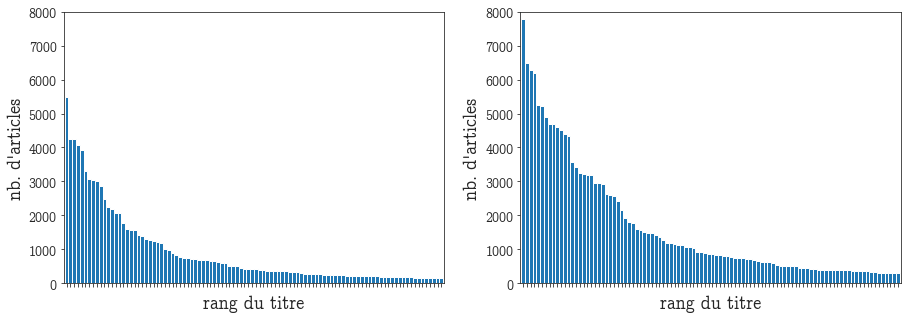

In [7]:
matplotlib.rcParams['font.family'] = 'CMU Concrete'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

df.heading.value_counts()[:100].plot.bar(ax=ax1, width=1)
ax1.set_ylim(top=8000)
ax1.set_xticklabels('')
ax1.set_ylabel("nb. d'articles", fontsize=18)
ax1.set_xlabel("rang du titre", fontsize=18)
ax1.grid(False)

df.heading2.value_counts()[:100].plot.bar(ax=ax2, width=1)
ax2.set_ylim(top=8000)
ax2.set_xticklabels('')
ax2.set_ylabel("nb. d'articles", fontsize=18)
ax2.set_xlabel("rang du titre", fontsize=18)
ax2.grid(False)

sns.set_style('whitegrid')

#plt.savefig('../references/memoire/images/title_normalisation.pdf', bbox_inches='tight')

plt.show()

In [8]:
def headings_plot(headings, timerange=np.arange(1802,1890), savepath=None, rolling=True, **kwargs):
    
    matplotlib.rcParams['font.family'] = 'CMU Concrete'
    plt.figure(figsize=figsize)
    
    total_articles = df[(df.year >= timerange[0]) & (df.year < timerange[-1])].groupby('year')['year'].count()
    data = []
    for name in headings:
        heading_counts = df[df.heading2 == name].groupby('year')['heading2'].count().reindex(timerange)
        if rolling == True:
            data.append((heading_counts/total_articles).fillna(0).rolling(5, min_periods=1).mean())
        else:
            data.append((heading_counts/total_articles).fillna(0))
            
            
    col = sns.color_palette("tab20", len(headings))
    plt.stackplot(timerange, data, labels=headings, colors=col)
        
    plt.grid(b=True, which='both')
    plt.xticks(ticks=timerange, labels=[str(i) if i%5==0 else '' for i in timerange], fontsize=14)
    plt.tick_params(axis ='x', rotation = 45)
    plt.ylabel('part de tous les articles', fontsize=20)
    plt.yticks(fontsize=14)

    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[::-1], labels[::-1], fontsize=12, **kwargs)
    sns.set_style('ticks')
    
    if savepath:
        plt.savefig(savepath, bbox_inches='tight')
    
    plt.show()

In [79]:
df.heading2.value_counts()[:30]

Paris                              7771
Neueste Nachrichten                6473
Riga                               6287
London                             6192
Witterungsbeobachtungen in Riga    5242
Wien                               5216
Bekanntmachungen                   4911
St. Petersburg                     4701
Berlin                             4684
Frankreich                         4616
Angekommene Fremde                 4527
Inländische Nachrichten            4388
Deutschland                        4350
Telegramme                         3571
Inland                             3426
Italien                            3246
Inhalt                             3217
Vermischtes                        3195
Groszbritannien und Irland         3190
Tägliche Eisenbahnzüge             2958
Madrid                             2945
Locales                            2939
Ist zu drucken erlaubt...          2621
Oesterreich                        2603
Deutsches Reich                    2560


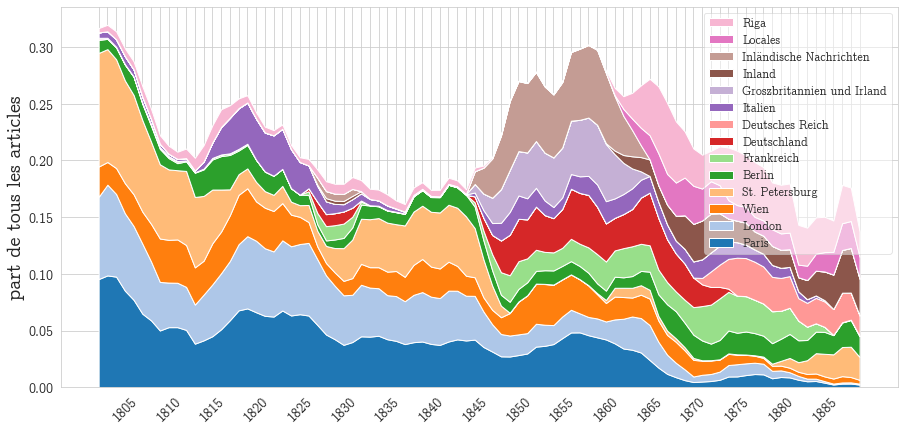

In [9]:
headings_plot(['Paris', 'London', 'Wien', 'St. Petersburg', 'Berlin', 'Frankreich',
               'Deutschland', 'Deutsches Reich', 'Italien', 'Groszbritannien und Irland', 'Inland',
               'Inländische Nachrichten', 'Locales', 'Riga'],
              framealpha=0.5,
              savepath='../references/memoire/images/headings_places.pdf')

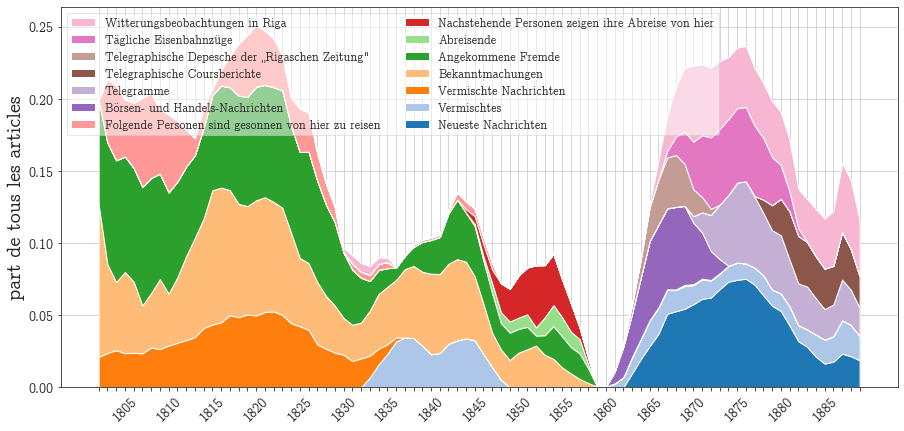

In [11]:
headings_plot(['Neueste Nachrichten',
               'Vermischtes',
               'Vermischte Nachrichten',
               'Bekanntmachungen',
               'Angekommene Fremde',
               'Abreisende',
               'Nachstehende Personen zeigen ihre Abreise von hier',
               'Folgende Personen sind gesonnen von hier zu reisen',
               'Börsen- und Handels-Nachrichten',
               'Telegramme',
               'Telegraphische Coursberichte',
               'Telegraphische Depesche der „Rigaschen Zeitung"',
               'Tägliche Eisenbahnzüge',
               'Witterungsbeobachtungen in Riga'],
              rolling=True, framealpha=0.5, loc='upper left', ncol=2,
              savepath='../references/memoire/images/headings_other.pdf')